## Step 1: Importing libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import the statsmodel module.
import statsmodels.api as sm
# Import the ols function from statsmodels.
from statsmodels.formula.api import ols

### Load the dataset

In [3]:
data = pd.read_csv('market.csv')

data.head()

,Date,oil,gold,rus,sp
0,04/11/2023,81.53,2019.0,1772.44,4136.50
1,04/10/2023,79.74,2003.8,1754.46,4136.25
2,04/06/2023,80.70,2026.4,1752.13,4132.00
3,04/05/2023,80.61,2020.9,1769.65,4117.25
4,04/04/2023,80.71,2022.2,1802.31,4129.00


## Step 2: Data exploration

Start with an exploratory data analysis to familiarize yourself with the data and prepare it for modeling.

The features in the data are:
* Oil - Crude oil futures on the New York Mercantile Exchange (NYMEX) are the world's most actively traded futures contract on a physical commodity (in dollars)
* Gold - Gold futures on the New York Mercantile Exchange (NYMEX) are the most actively traded futures contract on a physical commodity (in dollars)
* Russell - E-mini Russell futures track the Russell 2000 Index, which measures the performance of the 2,000 smallest companies in the Russell 3000 Index (in dollars)
* S&P 500 - E-mini S&P 500 futures are based on the underlying SPX and closely track the U.S. benchmark(in dollars)

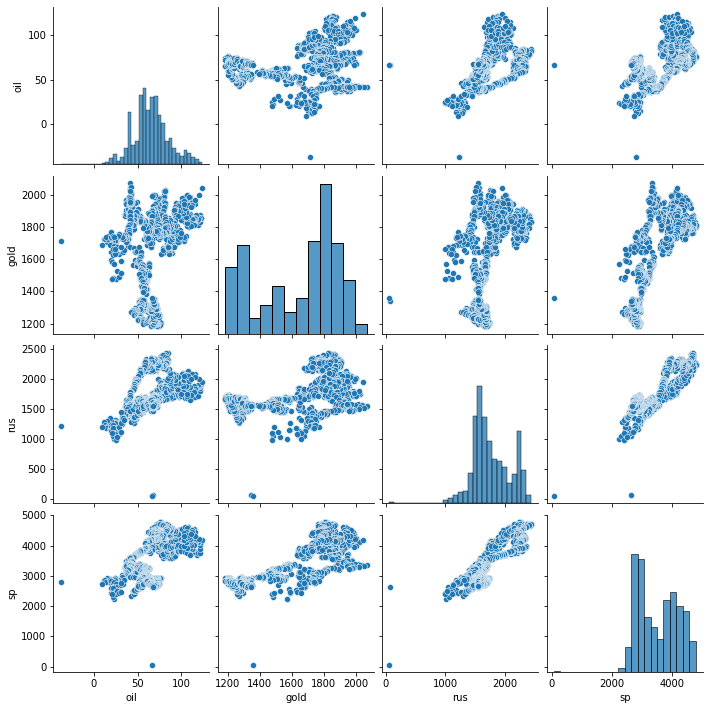

In [4]:
sns.pairplot(data);

### Step 3: Model building

In [5]:
# Define the OLS formula.
ols_formula_mul = 'sp ~ oil + gold + rus'

# Create an OLS model.
OLS = ols(formula = ols_formula_mul, data = data)

# Fit the model.
model_mul = OLS.fit()

# Save the results summary.
model_results_mul = model_mul.summary()

# Display the model results.
model_results_mul

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     sp   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     6685.
Date:                Wed, 12 Apr 2023   Prob (F-statistic):               0.00
Time:                        10:41:46   Log-Likelihood:                -8189.3
No. Observations:                1260   AIC:                         1.639e+04
Df Residuals:                    1256   BIC:                         1.641e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1013.8087     33.302    -30.443      0.000   -1079.142    -948.476
oil            6.9634      0.263     26.436      0.000       6.447       7.480
gold           1.2509      0.021     59.132      0.000       1.209       1.292
rus            1.1408      0.019     58.931      0.000       1.103       1.179
==============================================================================
Omnibus:                      213.823   Durbin-Watson:                   0.434
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2730.831
Skew:                           0.352   Prob(JB):                         0.00
Kurtosis:                      10.178   Cond. No.                     1.79e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.79e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Step 4: Interpret the model results

**Point:** The R-squared on the top right of the output above measures the proportion of variation in the dependent variable (Y) explained by the independent variables (X). 

Using `oil`, `gold` , `russell` as Xs result in a linear regression model with $R^{2} = 0.941$. In other words, `the above variables explain $94.1\%$ of the variation in S&P500 future`.

**Point** The p-value for all coefficients is  0.000
 , meaning all coefficients are statistically significant at  𝑝=0.05
 .

**Point:** The relationship between Xs and `Y` in the form of a linear equation

the model coefficients are:

* $\beta_{0} =  -1013.81 $
* $\beta_{Oil}= 6.96$
* $\beta_{Gold} = 1.25 $
* $\beta_{Russell} =  1.14$


$\text{S&P500} = -1013.81 - 6.96*X_{Oil}+ 1.25*X_{Gold}+ 1.14*X_{Russell}$